In [1]:
#优点
#因为决策树的原理很简单，所以它的训练和预测速度都非常快。另外，多任务可以直接并行计算，因为每棵树都是完全独立的。
#多棵树可以进行概率分类：多个评估器之间的多数投票可以给出概率的估计值（使用Scikit-Learn 的predict_proba() 方法）。
#无参数模型很灵活，在其他评估器都欠拟合的任务中表现突出。
#缺点
#其结果不太容易解释，也就是说，如果你想要总结分类模型的意义，随机森林可能不是最佳选择。

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

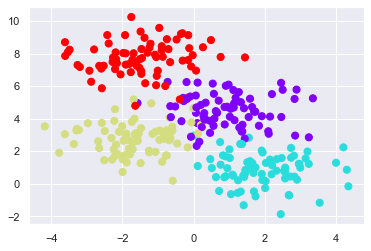

In [2]:
#准备数据
import sklearn.datasets

X, y = sklearn.datasets.make_blobs(n_samples=300, centers=4,random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [3]:
#决策树
import sklearn.tree
tree = sklearn.tree.DecisionTreeClassifier().fit(X, y)

C:\Users\hnjyz\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'clim'


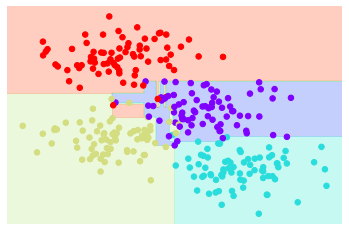

In [6]:
#对结果进行可视化
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    

#从图上可以看到，决策树一定会过拟合
visualize_classifier(sklearn.tree.DecisionTreeClassifier(), X, y)

C:\Users\hnjyz\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'clim'


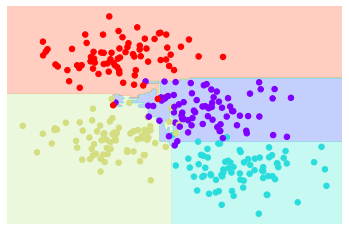

In [10]:
#通过组合多个过拟合评估器来降低过拟合程度的想法其实是一种集成学习方法，称为装袋算法
#装袋算法使用并行评估器对数据进行有放回抽取集成（也可以说是大杂烩），每个评估器都对数据过拟合，通过求均值可以获得更好的分类结果。
#评估器集成算法：随机森林
#分类
import sklearn.tree 
import sklearn.ensemble

tree = sklearn.tree.DecisionTreeClassifier()
bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8,random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

C:\Users\hnjyz\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'clim'


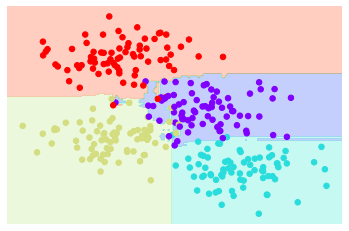

In [12]:
#随机策略选择：让所有数据在每次训练时都被拟合，但拟合的结果却仍然是随机的。例如，当需要确定对哪个特征进行分割时，随机树可能会从最前面的几个特征中挑选。
#参考https://scikit-learn.org/stable/modules/ensemble.html#forest
import sklearn.ensemble

model = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

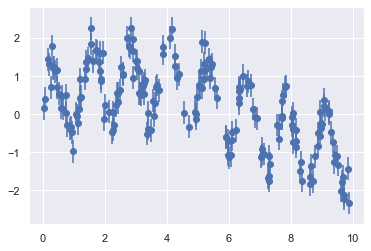

In [13]:
#随机森林回归
#生成数据
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

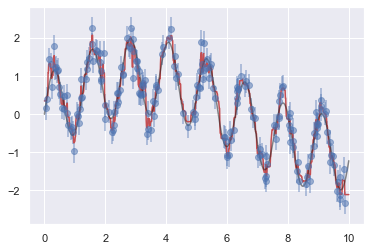

In [14]:
import sklearn.ensemble
forest = sklearn.ensemble.RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);